# Importing Libraries

In [49]:
import pandas as pd
import numpy as np
import os,sys
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [50]:
df=pd.read_csv("final_data.csv")
df

,Person,Wav file,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,spread1,spread2,D2,Language
0,phon_R01_S01,1,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,...,0.172448,0.332584,0.068307,0.511745,1,0.369155,0.569875,0.585765,0.390661,English
1,phon_R01_S01,2,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,...,0.279424,0.516048,0.059331,0.432577,1,0.470830,0.703277,0.741337,0.473145,English
2,phon_R01_S01,3,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,...,0.219848,0.443317,0.039596,0.496220,1,0.404416,0.636745,0.686371,0.408819,English
3,phon_R01_S01,4,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,...,0.233785,0.475478,0.040997,0.495936,1,0.416255,0.695627,0.738089,0.436977,English
4,phon_R01_S01,5,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,...,0.286852,0.584542,0.054174,0.455499,1,0.375159,0.762472,0.513798,0.404336,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,Giovanni N,FB1GNIEOGVL47M100220171227.wav,0.084560,0.154335,0.000000,0.332513,0.195660,0.195660,0.136451,0.015281,...,0.000704,0.068809,0.000009,0.458750,1,1.000000,0.158430,0.121012,0.189002,Italian
974,Giovanni N,VE1GNIEOGVL47M100220171217.wav,0.114065,0.066639,0.185473,0.025221,0.007774,0.007774,0.003451,0.077839,...,0.004685,0.321100,0.000004,0.656652,1,1.000000,0.004327,0.003943,0.021613,Italian
975,Giovanni N,VE2GNIEOGVL47M100220171217.wav,0.112482,0.058299,0.253689,0.008800,0.006458,0.006458,0.004393,0.094102,...,0.006469,0.402055,0.000003,0.695349,1,1.000000,0.005956,0.003861,0.741534,Italian
976,Giovanni N,VU1GNIEOGVL47M100220171224.wav,0.105222,0.081198,0.208788,0.020757,0.008781,0.008781,0.003242,0.019473,...,0.001060,0.304815,0.000001,0.829883,1,1.000000,0.004782,0.003894,0.032435,Italian


# Renaming columns

In [51]:
df.rename(columns=({'Person':'name','Wav file':'Audio file','MDVP:Fo(Hz)':'avg_fre', 'MDVP:Fhi(Hz)':'max_fre', 'MDVP:Flo(Hz)':'min_fre', 'MDVP:Jitter(%)':'var_fre1',
       'MDVP:Jitter(Abs)':'var_fre2', 'MDVP:RAP':'var_fre3', 'MDVP:PPQ':'var_fre4', 'Jitter:DDP':'var_fre5',
       'MDVP:Shimmer':'var_amp1', 'MDVP:Shimmer(dB)':'var_amp2', 'Shimmer:APQ3':'var_amp3', 'Shimmer:APQ5':'var_amp4',
       'MDVP:APQ':'var_amp5', 'Shimmer:DDA':'var_amp6'}),inplace=True)
df

,name,Audio file,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,...,var_amp5,var_amp6,NHR,HNR,status,RPDE,spread1,spread2,D2,Language
0,phon_R01_S01,1,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,...,0.172448,0.332584,0.068307,0.511745,1,0.369155,0.569875,0.585765,0.390661,English
1,phon_R01_S01,2,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,...,0.279424,0.516048,0.059331,0.432577,1,0.470830,0.703277,0.741337,0.473145,English
2,phon_R01_S01,3,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,...,0.219848,0.443317,0.039596,0.496220,1,0.404416,0.636745,0.686371,0.408819,English
3,phon_R01_S01,4,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,...,0.233785,0.475478,0.040997,0.495936,1,0.416255,0.695627,0.738089,0.436977,English
4,phon_R01_S01,5,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,...,0.286852,0.584542,0.054174,0.455499,1,0.375159,0.762472,0.513798,0.404336,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,Giovanni N,FB1GNIEOGVL47M100220171227.wav,0.084560,0.154335,0.000000,0.332513,0.195660,0.195660,0.136451,0.015281,...,0.000704,0.068809,0.000009,0.458750,1,1.000000,0.158430,0.121012,0.189002,Italian
974,Giovanni N,VE1GNIEOGVL47M100220171217.wav,0.114065,0.066639,0.185473,0.025221,0.007774,0.007774,0.003451,0.077839,...,0.004685,0.321100,0.000004,0.656652,1,1.000000,0.004327,0.003943,0.021613,Italian
975,Giovanni N,VE2GNIEOGVL47M100220171217.wav,0.112482,0.058299,0.253689,0.008800,0.006458,0.006458,0.004393,0.094102,...,0.006469,0.402055,0.000003,0.695349,1,1.000000,0.005956,0.003861,0.741534,Italian
976,Giovanni N,VU1GNIEOGVL47M100220171224.wav,0.105222,0.081198,0.208788,0.020757,0.008781,0.008781,0.003242,0.019473,...,0.001060,0.304815,0.000001,0.829883,1,1.000000,0.004782,0.003894,0.032435,Italian


# Dimensions of Dataset

In [52]:
df.shape

(978, 24)

# Peak at the Data

In [53]:
df.head(20)

,name,Audio file,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,...,var_amp5,var_amp6,NHR,HNR,status,RPDE,spread1,spread2,D2,Language
0,phon_R01_S01,1,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,...,0.172448,0.332584,0.068307,0.511745,1,0.369155,0.569875,0.585765,0.390661,English
1,phon_R01_S01,2,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,...,0.279424,0.516048,0.059331,0.432577,1,0.470830,0.703277,0.741337,0.473145,English
2,phon_R01_S01,3,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,...,0.219848,0.443317,0.039596,0.496220,1,0.404416,0.636745,0.686371,0.408819,English
3,phon_R01_S01,4,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,...,0.233785,0.475478,0.040997,0.495936,1,0.416255,0.695627,0.738089,0.436977,English
4,phon_R01_S01,5,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,...,0.286852,0.584542,0.054174,0.455499,1,0.375159,0.762472,0.513798,0.404336,English
5,phon_R01_S01,6,0.187568,0.059232,0.278139,0.254130,0.288538,0.190270,0.352626,0.190079,...,0.193277,0.360829,0.036827,0.525766,1,0.370978,0.672961,0.659218,0.339999,English
6,phon_R01_S02,1,0.185909,0.071647,0.284086,0.052414,0.090909,0.041908,0.058950,0.042061,...,0.048396,0.062460,0.017252,0.668333,1,0.792079,0.421385,0.565955,0.191959,English
7,phon_R01_S02,2,0.110606,0.023873,0.223606,0.038755,0.090909,0.036609,0.048232,0.036442,...,0.041121,0.072089,0.008881,0.749858,1,0.888630,0.324968,0.399458,0.285340,English
8,phon_R01_S02,3,0.043063,0.061082,0.151289,0.121665,0.209486,0.108382,0.128617,0.108525,...,0.076422,0.119014,0.031989,0.543404,1,0.837604,0.445910,0.723731,0.400034,English
9,phon_R01_S02,4,0.039139,0.036658,0.148249,0.115629,0.209486,0.096339,0.128617,0.096163,...,0.132093,0.190012,0.030461,0.545436,1,0.677741,0.533923,0.719740,0.449094,English


# Statistical Summary

In [54]:
df.describe()

,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,var_amp1,var_amp2,...,var_amp4,var_amp5,var_amp6,NHR,HNR,status,RPDE,spread1,spread2,D2
count,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,...,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000
mean,0.245989,0.231106,0.215399,0.153571,0.165465,0.161362,0.149261,0.094113,0.110927,0.507928,...,0.096796,0.045889,0.232591,0.018128,0.580687,0.594070,0.911111,0.162637,0.171494,0.202054
std,0.171647,0.182151,0.226916,0.177699,0.197550,0.198358,0.203944,0.140511,0.141478,0.246775,...,0.144786,0.112388,0.195604,0.079044,0.227378,0.491322,0.210160,0.199178,0.212456,0.214329
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.134997,0.112431,0.023516,0.023270,0.026333,0.027060,0.016204,0.017077,0.025050,0.350558,...,0.013632,0.000642,0.066630,0.000004,0.445247,0.000000,1.000000,0.015582,0.012710,0.026147
50%,0.202637,0.193230,0.157055,0.085577,0.090909,0.075626,0.072000,0.048816,0.066755,0.563728,...,0.043384,0.004617,0.187879,0.000055,0.648739,1.000000,1.000000,0.063767,0.069586,0.136717
75%,0.317937,0.288399,0.298659,0.233110,0.234455,0.225747,0.180984,0.109284,0.130797,0.697367,...,0.104282,0.032908,0.343325,0.000708,0.743458,1.000000,1.000000,0.250454,0.278385,0.287871
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Information of the dataset

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        978 non-null    object 
 1   Audio file  978 non-null    object 
 2   avg_fre     978 non-null    float64
 3   max_fre     978 non-null    float64
 4   min_fre     978 non-null    float64
 5   var_fre1    978 non-null    float64
 6   var_fre2    978 non-null    float64
 7   var_fre3    978 non-null    float64
 8   var_fre4    978 non-null    float64
 9   var_fre5    978 non-null    float64
 10  var_amp1    978 non-null    float64
 11  var_amp2    978 non-null    float64
 12  var_amp3    978 non-null    float64
 13  var_amp4    978 non-null    float64
 14  var_amp5    978 non-null    float64
 15  var_amp6    978 non-null    float64
 16  NHR         978 non-null    float64
 17  HNR         978 non-null    float64
 18  status      978 non-null    int64  
 19  RPDE        978 non-null    f

# Duplicate Entries

In [56]:
df.duplicated().sum()

0

# Seperate Italian and English Data

In [57]:
english_df = df[df['Language'] == 'English']
italian_df = df[df['Language'] == 'Italian']

# unwanted columns

In [58]:
english_df.drop(columns="name",axis=1,inplace=True)
english_df.drop(columns="Audio file", axis=1, inplace=True)
english_df.drop(columns="Language",axis=1,inplace=True)
english_df

,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,var_amp1,var_amp2,...,var_amp4,var_amp5,var_amp6,NHR,HNR,status,RPDE,spread1,spread2,D2
0,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,0.312215,0.280197,...,0.347354,0.172448,0.332584,0.068307,0.511745,1,0.369155,0.569875,0.585765,0.390661
1,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,0.472887,0.444536,...,0.535685,0.279424,0.516048,0.059331,0.432577,1,0.470830,0.703277,0.741337,0.473145
2,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,0.390634,0.326212,...,0.446133,0.219848,0.443317,0.039596,0.496220,1,0.404416,0.636745,0.686371,0.408819
3,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,0.414278,0.354971,...,0.466079,0.233785,0.475478,0.040997,0.495936,1,0.416255,0.695627,0.738089,0.436977
4,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,0.499452,0.410025,...,0.577341,0.286852,0.584542,0.054174,0.455499,1,0.375159,0.762472,0.513798,0.404336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.499820,0.262986,0.165722,0.092440,0.090909,0.093931,0.089496,0.094076,0.286014,0.262942,...,0.261601,0.155142,0.362306,0.085909,0.450134,0,0.447684,0.257894,0.260408,0.549049
188,0.705488,0.307974,0.138243,0.125794,0.090909,0.126686,0.107181,0.126826,0.164050,0.146261,...,0.147490,0.088828,0.221338,0.055543,0.435097,0,0.408567,0.319956,0.276956,0.605474
189,0.502730,0.281413,0.050727,0.378653,0.288538,0.267823,0.252947,0.267940,0.123608,0.140509,...,0.107870,0.072594,0.156631,0.338988,0.383728,0,0.352318,0.212945,0.342577,0.558967
190,0.642893,0.601807,0.054279,0.181703,0.130435,0.145472,0.159700,0.145288,0.122512,0.128184,...,0.101900,0.066544,0.155989,0.227838,0.429936,0,0.454176,0.220650,0.452885,0.318222


# Missing values

In [59]:
english_df.isnull().sum()

avg_fre     0
max_fre     0
min_fre     0
var_fre1    0
var_fre2    0
var_fre3    0
var_fre4    0
var_fre5    0
var_amp1    0
var_amp2    0
var_amp3    0
var_amp4    0
var_amp5    0
var_amp6    0
NHR         0
HNR         0
status      0
RPDE        0
spread1     0
spread2     0
D2          0
dtype: int64

In [60]:
english_df.notnull()

,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,var_amp1,var_amp2,...,var_amp4,var_amp5,var_amp6,NHR,HNR,status,RPDE,spread1,spread2,D2
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
188,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
189,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
190,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


# Outliers

In [61]:
english_df.columns

Index(['avg_fre', 'max_fre', 'min_fre', 'var_fre1', 'var_fre2', 'var_fre3',
       'var_fre4', 'var_fre5', 'var_amp1', 'var_amp2', 'var_amp3', 'var_amp4',
       'var_amp5', 'var_amp6', 'NHR', 'HNR', 'status', 'RPDE', 'spread1',
       'spread2', 'D2'],
      dtype='object')

In [62]:
english_df.skew()

avg_fre     0.617002
max_fre     2.537298
min_fre     1.226383
var_fre1    3.155544
var_fre2    2.716911
var_fre3    3.481795
var_fre4    3.070209
var_fre5    3.483278
var_amp1    1.716949
var_amp2    2.026535
var_amp3    1.640369
var_amp4    1.859161
var_amp5    2.742489
var_amp6    1.640417
NHR         4.520099
HNR        -0.448781
status     -1.163813
RPDE       -0.141046
spread1     0.424148
spread2     0.155065
D2          0.414672
dtype: float64

# Determining Depentend & Independent Variables

In [63]:
# get features and labels
x=english_df.loc[:,english_df.columns!='status'].values[:,1:]
x1=english_df.loc[:,english_df.columns!='status']
y=english_df.loc[:,'status'].values
y1=english_df.loc[:,'status']

# Analyzing Features

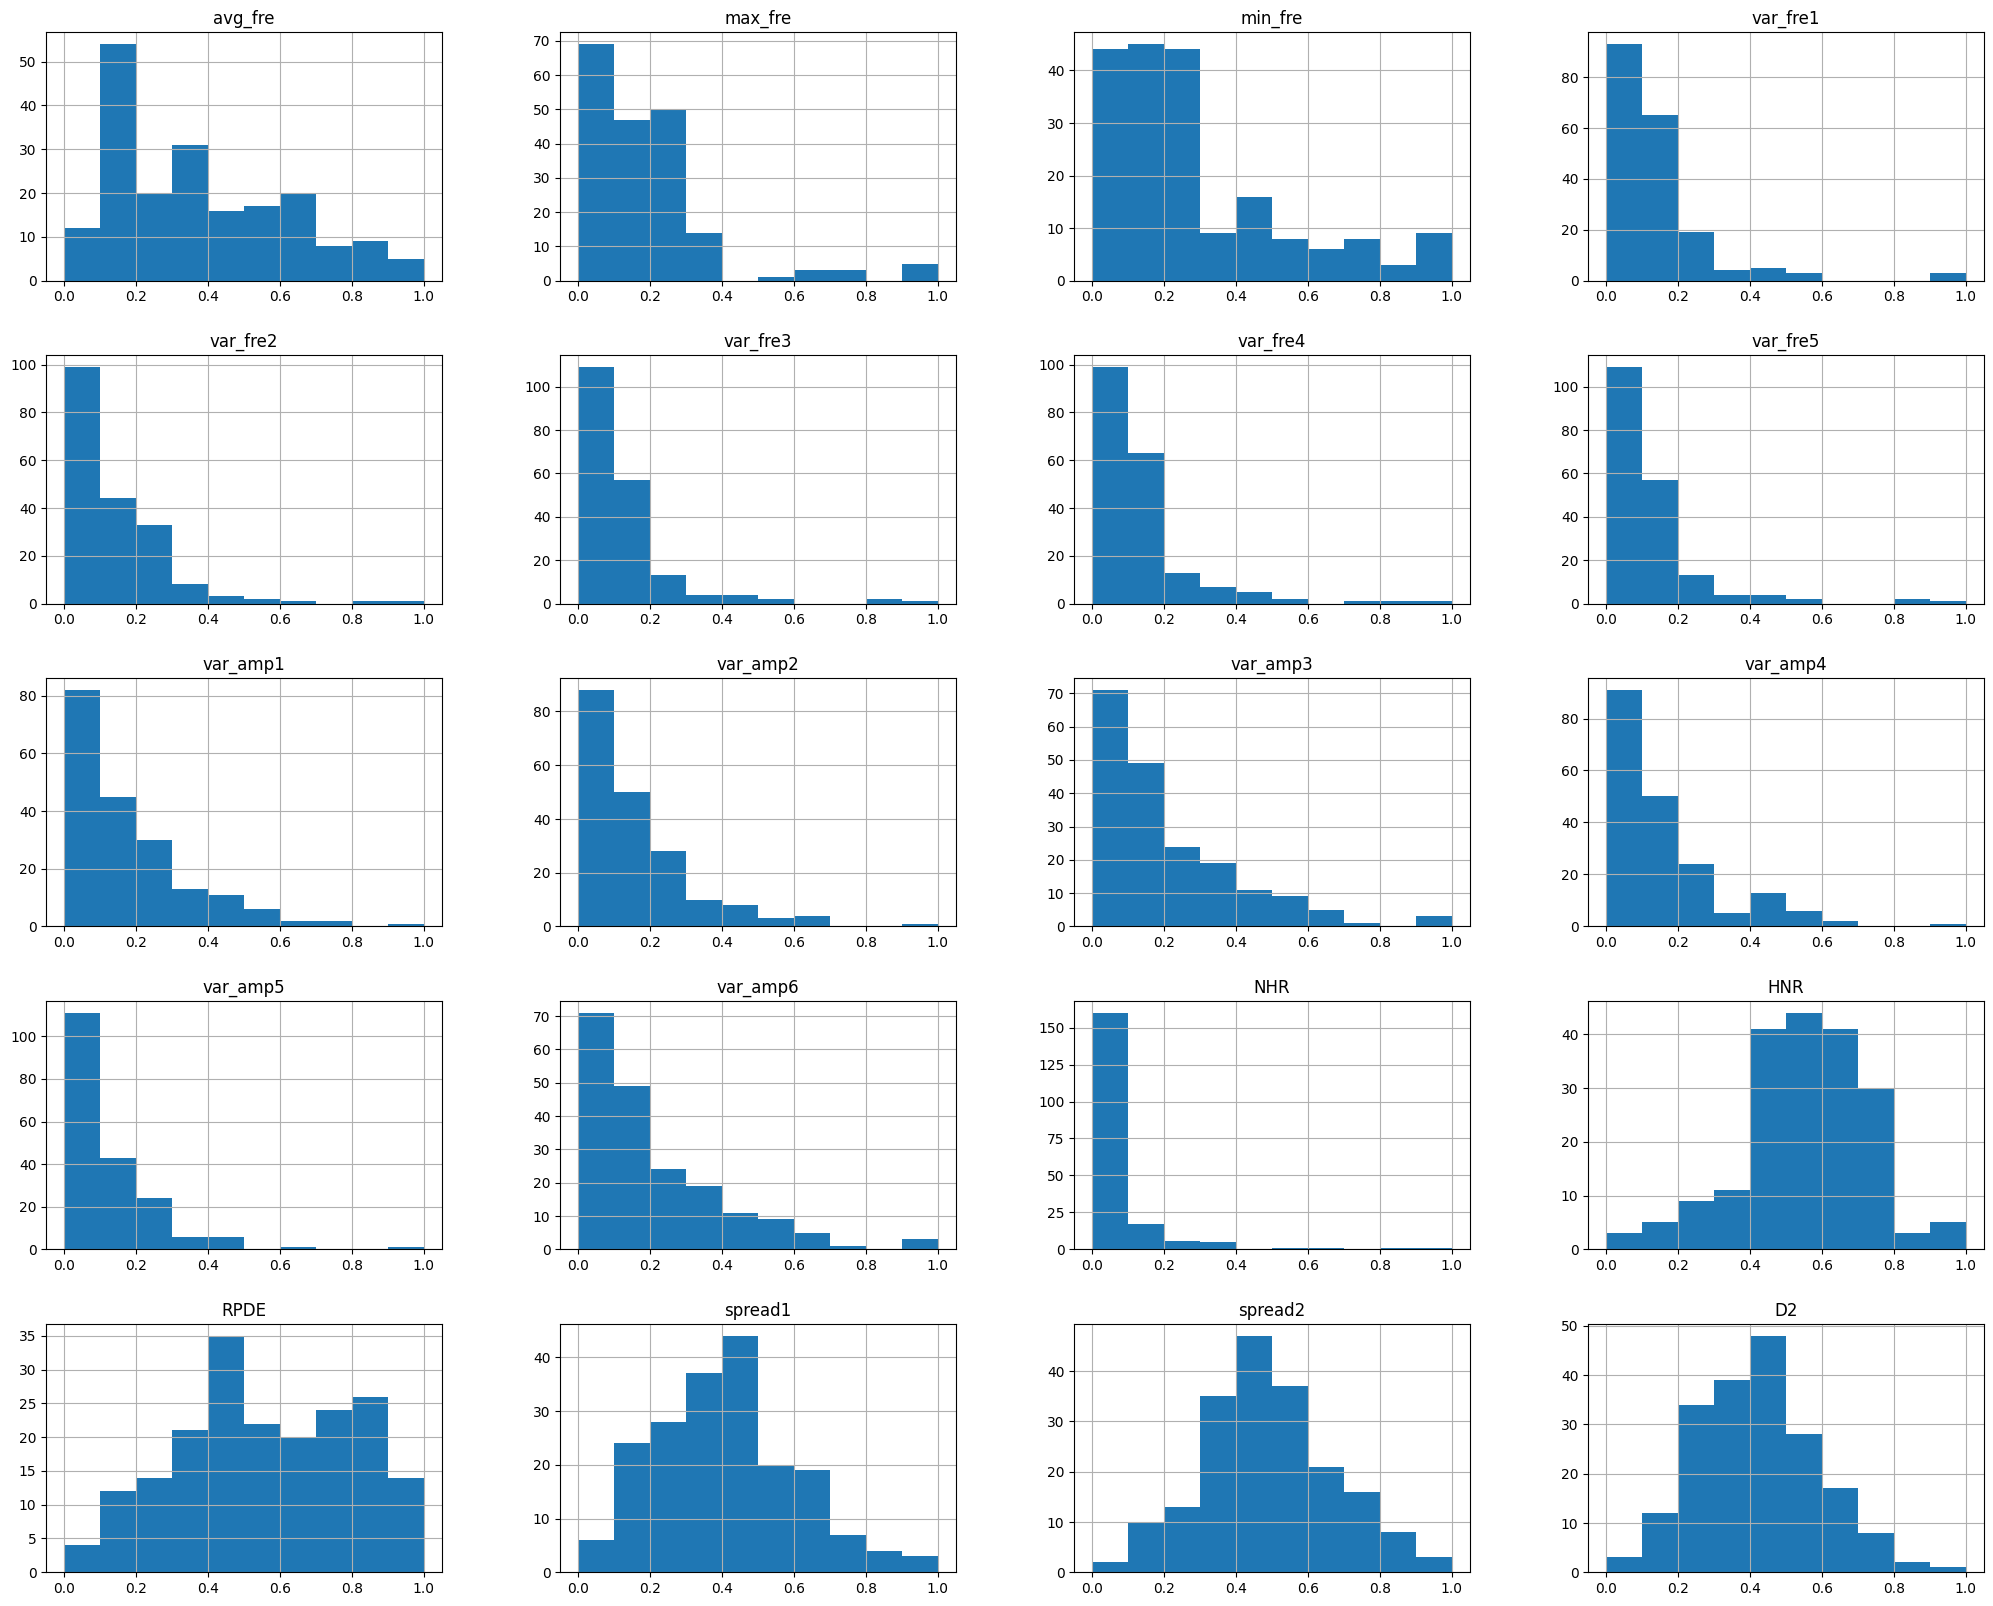

In [64]:
x1.hist(figsize=(25,20))
plt.show()

In [65]:
english_df=df[df.max_fre<=300]
english_df=english_df[english_df.var_fre1<=0.02]
english_df=english_df[english_df.var_fre2<=0.0001]
english_df=english_df[english_df.var_fre3<=0.01]
english_df=english_df[english_df.var_fre4<=0.01]
english_df=english_df[english_df.var_fre5<=0.02]
english_df=english_df[english_df.var_amp1<=0.10]
english_df=english_df[english_df.var_amp2<=1.0]
english_df=english_df[english_df.var_amp3<=0.04]
english_df=english_df[english_df.var_amp4<=0.050]
english_df=english_df[english_df.var_amp5<=0.075]
english_df=english_df[english_df.var_amp6<=0.125]
english_df=english_df[english_df.NHR<=0.15]

In [66]:
english_df.skew()

name          NaN
Audio file    NaN
avg_fre       NaN
max_fre       NaN
min_fre       NaN
var_fre1      NaN
var_fre2      NaN
var_fre3      NaN
var_fre4      NaN
var_fre5      NaN
var_amp1      NaN
var_amp2      NaN
var_amp3      NaN
var_amp4      NaN
var_amp5      NaN
var_amp6      NaN
NHR           NaN
HNR           NaN
status        NaN
RPDE          NaN
spread1       NaN
spread2       NaN
D2            NaN
Language      NaN
dtype: object

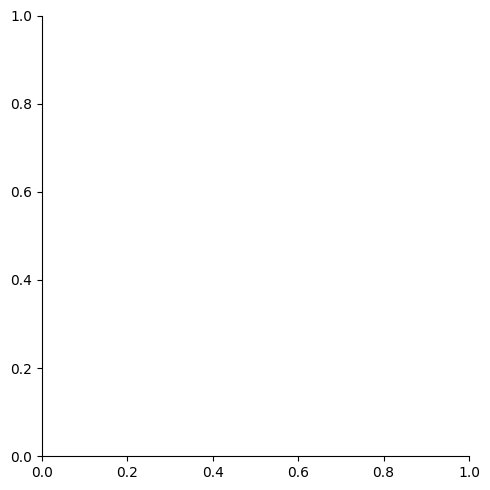

In [67]:
sns.displot(english_df['NHR'])

In [68]:
df=df[df.NHR<=0.06]
df.skew()

TypeError: could not convert string to float: 'phon_R01_S01'

# Correlation Matrix

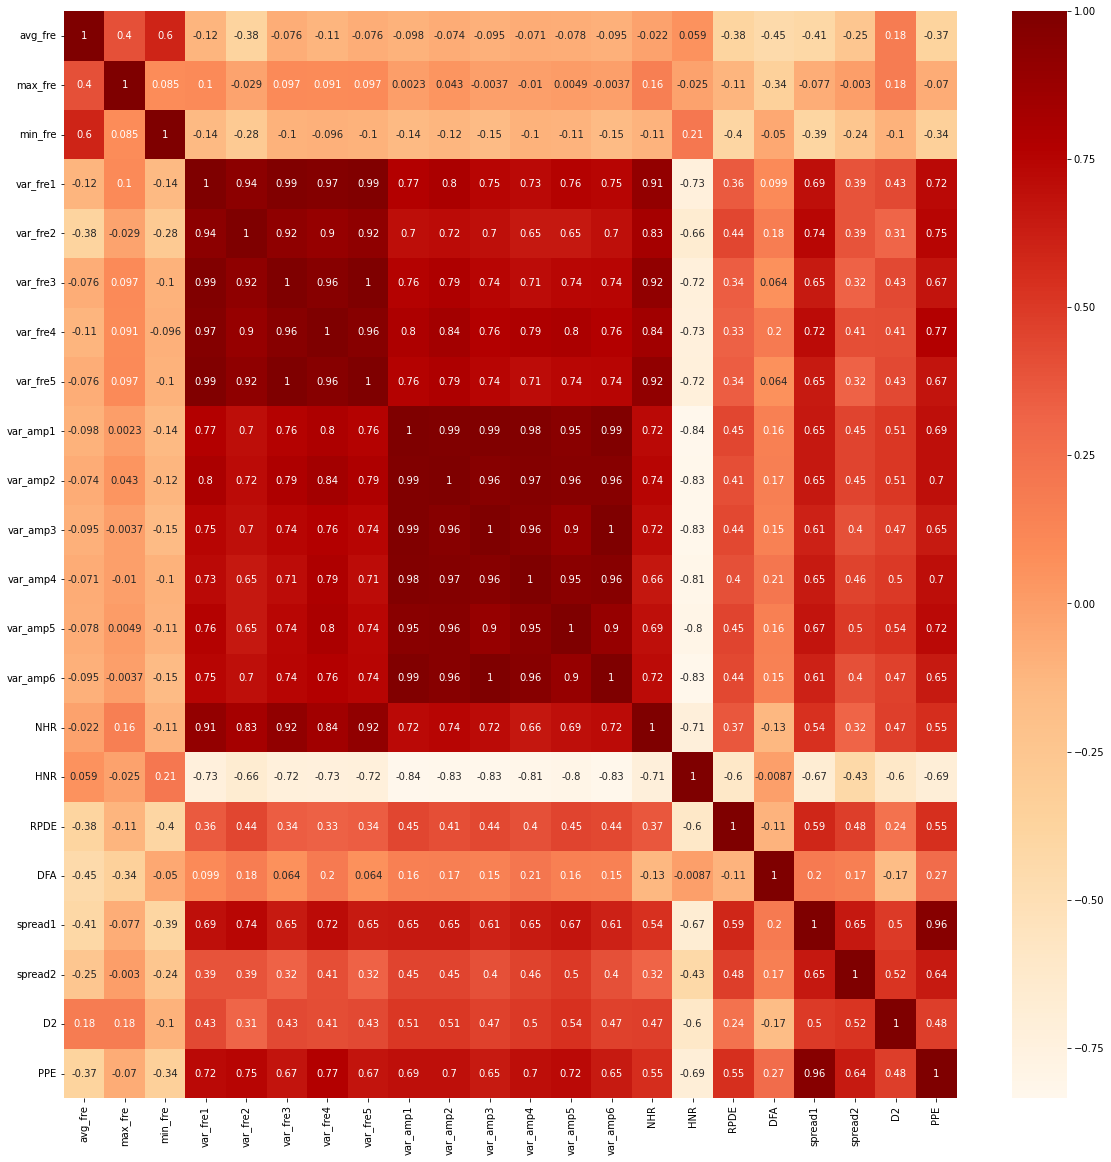

In [ ]:
correl=x1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correl,annot=True,cmap='OrRd')
plt.show()

In [ ]:
#Scale the features to between -1 and 1
scaler=MinMaxScaler((-1,1))
x1=scaler.fit_transform(x)
y1=y

In [ ]:
#Split the dataset

xtrain,xtest,ytrain,ytest=train_test_split(x1, y1, test_size=0.2)

In [ ]:
# Train the model
from xgboost import XGBClassifier


model=XGBClassifier()
model.fit(xtrain,ytrain)
predict=model.predict(xtest)


[13:46:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
print(accuracy_score(ytest,predict)*100)

92.3076923076923


# Implementing Confusion Matrix

Text(0.5, 1.0, 'Output Confusion Matrix')

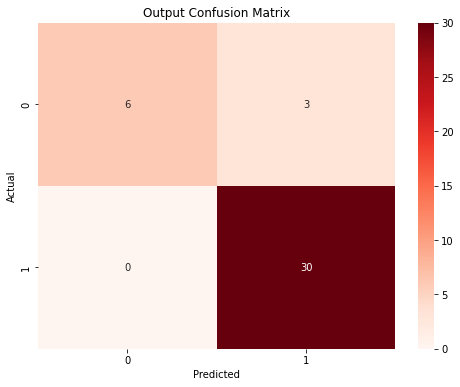

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,predict)
plt.figure(figsize=(8,6))
fg=sns.heatmap(cm,annot=True,cmap="Reds")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix")

# Output Display

In [ ]:
pd.DataFrame({'actual':ytest,'predict':predict})

,actual,predict
0,1,1
1,1,1
2,0,0
3,0,1
4,0,0
5,1,1
6,1,1
7,1,1
8,0,1
9,1,1


# Prediction With New Input 

In [ ]:
newinput=[[274.688,240.005,174.287,0.01360,0.01008,0.00624,0.00564,0.01873,1.02308,0.256,0.51268,0.01365,0.81667,0.63804,0.10715,6.883,0.607567,0.158453,3.679772,0.131728]]


In [ ]:
output=model.predict(newinput)
output

array([1])